<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она работает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [121]:
data = pd.read_csv('./train.csv')

In [122]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [123]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [124]:
unique = {}
for col in feature_cols:
    unique[col] = [data[col].unique()]
pd.DataFrame(unique)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,"[55, 72, 1, 32, 60, 25, 27, 50, 16, 70, 69, 26...","[19.5, 25.85, 75.9, 79.3, 115.25, 19.8, 90.15,...","[1026.35, 1872.2, 75.9, 2570, 6758.45, 475.2, ...","[Male, Female]","[0, 1]","[Yes, No]","[Yes, No]","[Yes, No]","[No, Yes, No phone service]","[No, Fiber optic, DSL]","[No internet service, No, Yes]","[No internet service, No, Yes]","[No internet service, No, Yes]","[No internet service, Yes, No]","[No internet service, No, Yes]","[No internet service, No, Yes]","[One year, Two year, Month-to-month]","[No, Yes]","[Mailed check, Credit card (automatic), Electr..."


In [125]:
pd.DataFrame(unique)['TotalSpent'].values

array([array(['1026.35', '1872.2', '75.9', ..., '55.05', '2215.25', '1375.6'],
             dtype=object)                                                    ],
      dtype=object)

Проверим гипотезу, что пропуски в стобце 'TotalSpent' соответствует строкам, в которых период пользования подписки нулевой.

In [126]:
((data[(data[num_cols[-1]] == ' ')]['TotalSpent'] == data[(data[num_cols[0]] == 0)]['TotalSpent']))

1048    True
1707    True
2543    True
3078    True
3697    True
4002    True
4326    True
4551    True
4598    True
Name: TotalSpent, dtype: bool

Так как таких строк всего 9, пропустим их

In [127]:
data.loc[(data[num_cols[-1]] == ' '), num_cols[-1]] = None
data = data.dropna()

In [128]:
pd.DataFrame(data.isna().sum()).transpose()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [129]:
print(data.shape)
data.head()

(5273, 20)


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


## Анализ данных (3 балла)

1) Для численных признаков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, если вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

### Matplotlib

In [29]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import matplotlib.colors as mcolors
%matplotlib inline

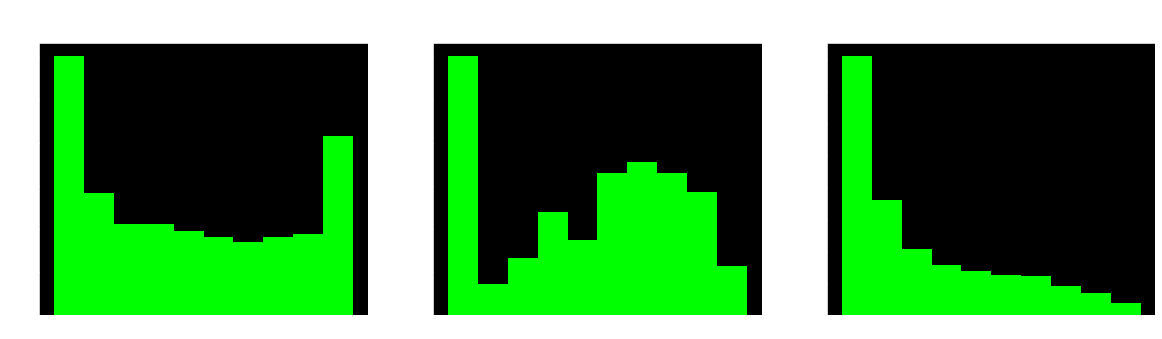

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(20,5))
fig.suptitle('Гистограммы для числовых признаков', fontsize=16)
for i in range(len(num_cols)):
    ax[i].hist(data[num_cols[i]], color='lime')
    ax[i].set_title(num_cols[i])
plt.show()

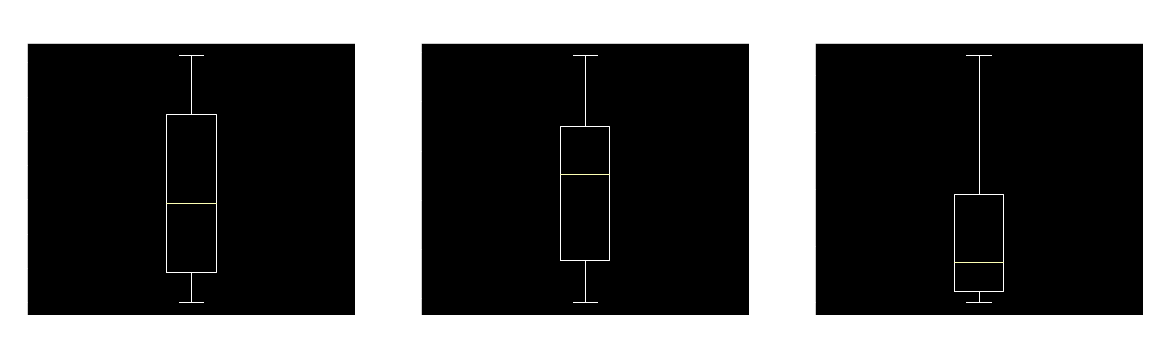

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(20,5))
fig.suptitle('Ящики с усами для числовых признаков', fontsize=16)
for i in range(len(num_cols)):
    ax[i].boxplot(data[num_cols[i]])
    ax[i].set_title(num_cols[i])
plt.show()

In [32]:
for col in cat_cols:
    print(data[col].value_counts(), end=f'\n[END COL = {col}]\n\n')

Male      2655
Female    2627
Name: Sex, dtype: int64
[END COL = Sex]

0    4440
1     842
Name: IsSeniorCitizen, dtype: int64
[END COL = IsSeniorCitizen]

No     2705
Yes    2577
Name: HasPartner, dtype: int64
[END COL = HasPartner]

No     3676
Yes    1606
Name: HasChild, dtype: int64
[END COL = HasChild]

Yes    4761
No      521
Name: HasPhoneService, dtype: int64
[END COL = HasPhoneService]

No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64
[END COL = HasMultiplePhoneNumbers]

Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64
[END COL = HasInternetService]

No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64
[END COL = HasOnlineSecurityService]

No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64
[END COL = HasOnlineBackup]

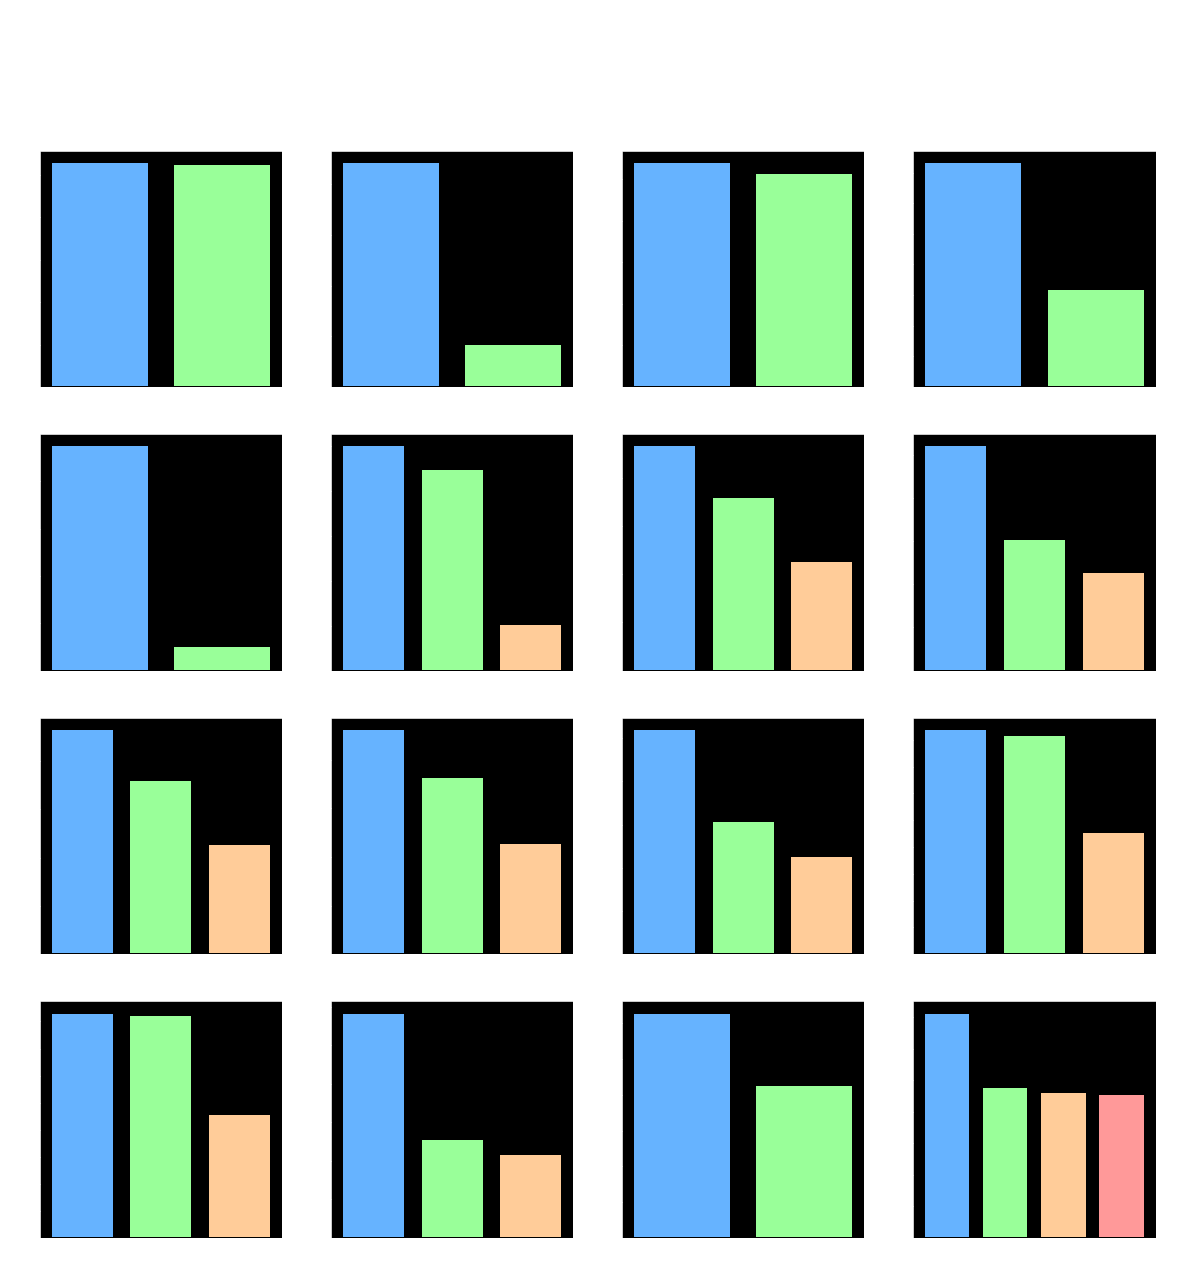

In [33]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20,20))
fig.suptitle('Стобчатая диаграмма для категориальных признаков', fontsize=16)
for i in range(16):
    colors = [['#66b3ff','#99ff99', '#ffcc99','#ff9999'][i] for i in range(min(4,len(data[cat_cols[i]].unique())))]
    ax[i//4][i%4].bar(data[cat_cols[i]].unique(),
                         data[cat_cols[i]].value_counts(),
                         color=colors, edgecolor='k', linewidth=2)
    ax[i//4][i%4].set_title(cat_cols[i])
plt.show()

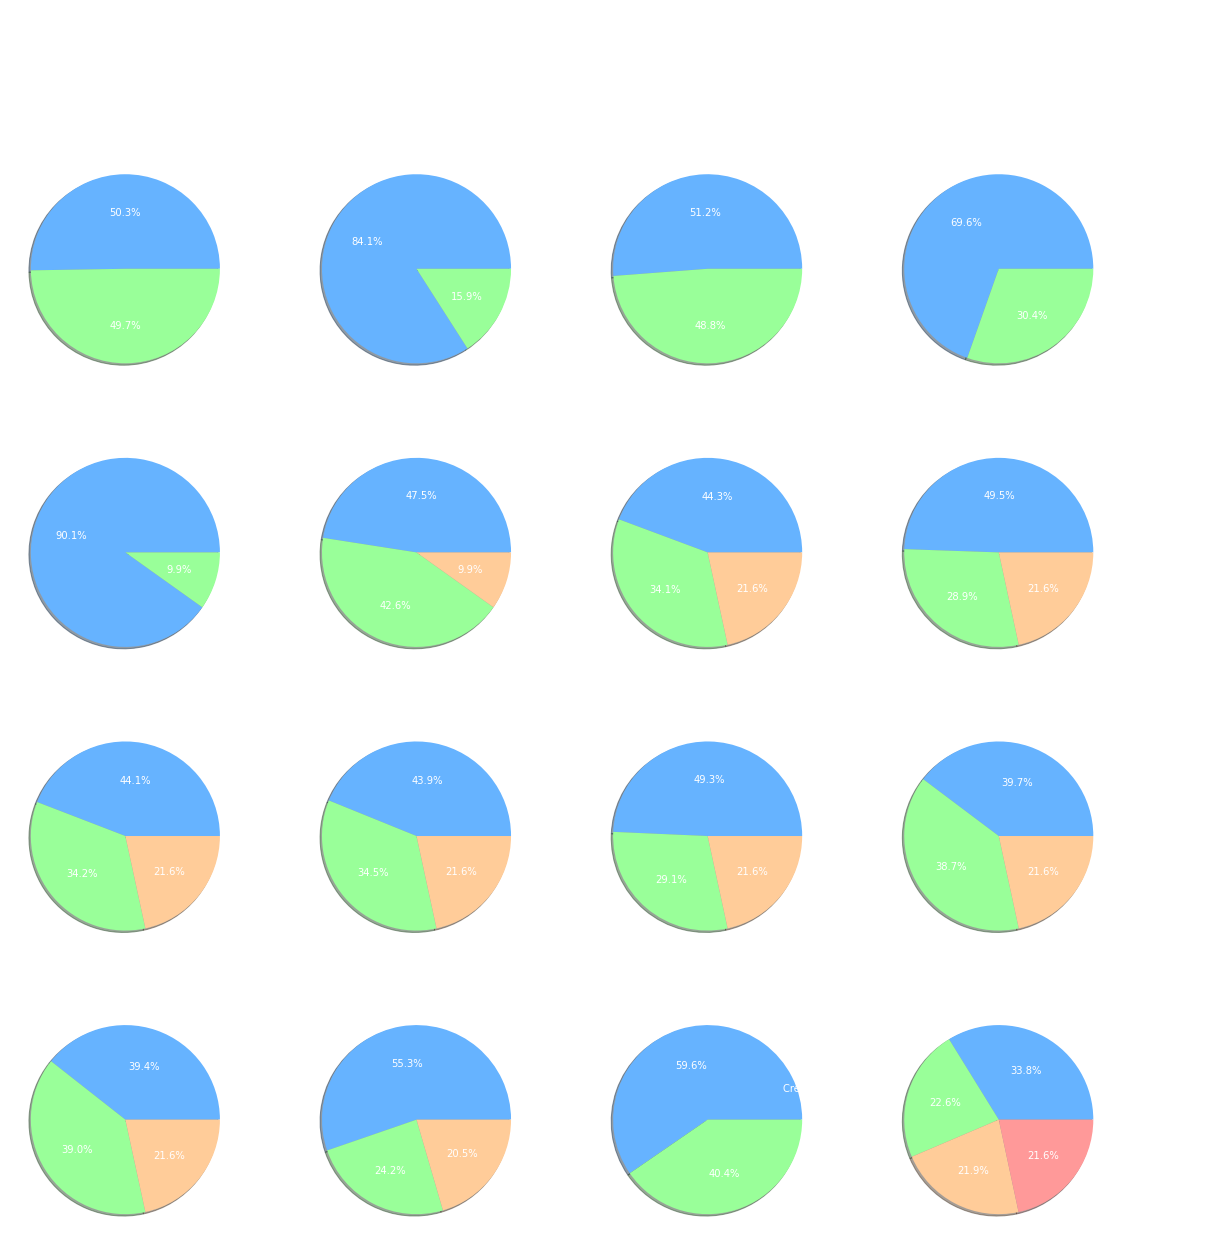

In [34]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20,20))
fig.suptitle('Pie для категориальных признаков', fontsize=16)
colors = ['#66b3ff','#99ff99','#ffcc99','#ff9999']
for i in range(16):
    ax[i//4][i%4].pie(data[cat_cols[i]].value_counts(), 
                            colors=colors[:len(data[cat_cols[i]].value_counts())],
                            shadow=True, autopct='%1.1f%%',
                            labels=data[cat_cols[i]].unique())
    ax[i//4][i%4].set_title(cat_cols[i])
plt.show()

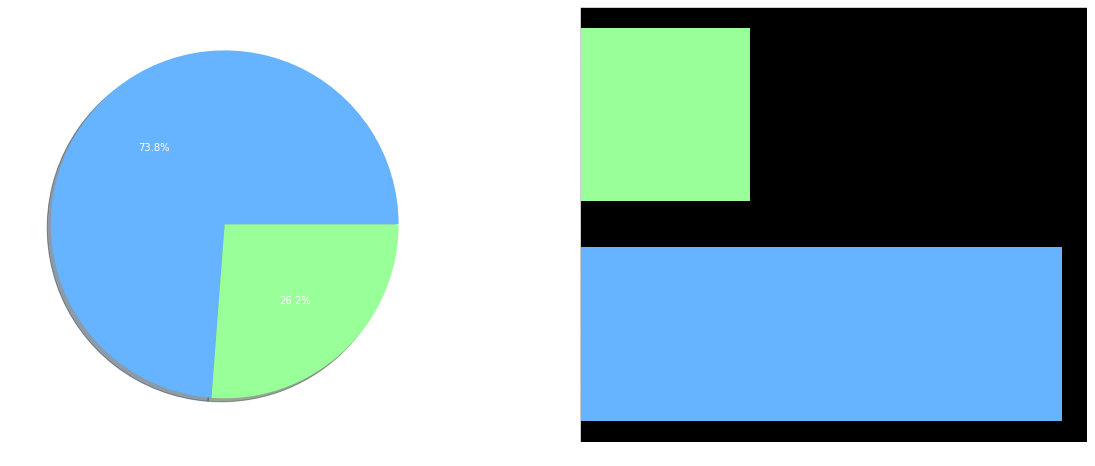

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax[0].pie(data[target_col].value_counts(), 
                            colors=colors[:len(data[target_col].value_counts())],
                            shadow=True, autopct='%1.1f%%',
                            labels=data[target_col].unique())
ax[1].barh(data[target_col].unique(),
                         data[target_col].value_counts(),
                         color=colors, edgecolor='k', linewidth=2)
plt.show()

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

В целевой переменной присутствует несбалансированность классов

In [17]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline, make_union
from sklearn.compose import ColumnTransformer, make_column_transformer

In [88]:
numeric_data = data[num_cols].values
categorical_data = data[cat_cols]

dummy_features = pd.get_dummies(categorical_data).values

In [89]:
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

In [90]:
X = np.hstack([numeric_data_scaled, dummy_features])
X_origin = data.iloc[:, :-1]
y = data[target_col].values

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
model = LogisticRegressionCV(cv = 5, solver='lbfgs', 
                                    Cs = np.arange(0.01, 100),
                                    scoring = 'roc_auc', refit = True,
                                    max_iter = 250)
model = model.fit(X_train, y_train)

In [93]:
model.C_

array([5.01])

In [94]:
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.8442179759377213

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [95]:
X_ = data.iloc[:, :-1]
y_ = data.iloc[:, -1:]
X_train_origin, X_test_origin, y_train_origin, y_test_origin = train_test_split(X_, y_, 
                                                       train_size=0.8, 
                                                       random_state=42)

In [96]:
import catboost

In [97]:
boosting_model = catboost.CatBoostClassifier(cat_features=cat_cols)
boosting_model.fit(X_train_origin, y_train_origin)

Learning rate set to 0.019048
0:	learn: 0.6801499	total: 88.8ms	remaining: 1m 28s
1:	learn: 0.6683861	total: 159ms	remaining: 1m 19s
2:	learn: 0.6574055	total: 224ms	remaining: 1m 14s
3:	learn: 0.6459140	total: 288ms	remaining: 1m 11s
4:	learn: 0.6353605	total: 357ms	remaining: 1m 11s
5:	learn: 0.6261610	total: 415ms	remaining: 1m 8s
6:	learn: 0.6167841	total: 475ms	remaining: 1m 7s
7:	learn: 0.6080311	total: 560ms	remaining: 1m 9s
8:	learn: 0.5997483	total: 640ms	remaining: 1m 10s
9:	learn: 0.5918432	total: 710ms	remaining: 1m 10s
10:	learn: 0.5839242	total: 796ms	remaining: 1m 11s
11:	learn: 0.5766678	total: 858ms	remaining: 1m 10s
12:	learn: 0.5701751	total: 903ms	remaining: 1m 8s
13:	learn: 0.5631203	total: 965ms	remaining: 1m 7s
14:	learn: 0.5566815	total: 1.02s	remaining: 1m 7s
15:	learn: 0.5507060	total: 1.09s	remaining: 1m 6s
16:	learn: 0.5449043	total: 1.16s	remaining: 1m 7s
17:	learn: 0.5390888	total: 1.22s	remaining: 1m 6s
18:	learn: 0.5338561	total: 1.28s	remaining: 1m 6s
1

In [111]:
boosting_model.predict_proba(X_test_origin)[:, 1]

array([0.31798346, 0.13692156, 0.01139108, ..., 0.18083071, 0.19168758,
       0.18995324])

In [98]:
roc_auc_score(y_test_origin, boosting_model.predict_proba(X_test_origin)[:, 1])

0.8404411417787214

In [101]:
import ipywidgets

In [102]:
_boosting_model = catboost.CatBoostClassifier(silent=True,
                                             cat_features=cat_cols,
                                             eval_metric='AUC')
_boosting_model.grid_search({'learning_rate': np.linspace(0, 1, 10), 
                           'num_trees': [50, 200, 500, 750]}, 
                           X_train_origin, 
                           y_train_origin, plot=True, refit=True)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8637483399
bestIteration = 45

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8637483	best: 0.8637483 (0)	total: 4s	remaining: 2m 36s

bestTest = 0.8625475665
bestIteration = 18

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8625476	best: 0.8637483 (0)	total: 8.41s	remaining: 2m 39s

bestTest = 0.8595851999
bestIteration = 12

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8595852	best: 0.8637483 (0)	total: 12.6s	remaining: 2m 35s

bestTest = 0.8629191525
bestIteration = 18

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8629192	best: 0.8637483 (0)	total: 16.3s	remaining: 2m 26s

bestTe

{'params': {'iterations': 200, 'learning_rate': 0.2222222222222222},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
 

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

0.85. LR = 0.222222, num_trees=200

# Предсказания

In [119]:
best_model = boosting_model

In [120]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:,1] #/ best_model.predict(X_test)
submission.to_csv('./my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.

Kaggle: Рябыкин Алексей

username: addicted_by

Номер посылки: 3

Результат: 0.84931